In [1]:
# !pip install tensorflow_hub

In [2]:
# !pip install tf_keras

In [3]:
# pip install tensorflow tensorflow-hub

In [4]:
# !pip install tensorflow_hub

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import PIL.Image as Image
import os
import cv2

import tensorflow as tf
import tf_keras as tfk
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = mobilenet_v2

In [8]:
IMAGE_SHAPE = (224, 224)

classifier = tfk.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [9]:
# IMAGE_SHAPE = (224, 224)

# classifier = tf.keras.applications.MobileNetV2(
#     input_shape=(224, 224, 3),
#     weights='imagenet',
# )

# classifier.trainable = False

In [10]:
# from tensorflow.keras.applications import MobileNetV2

# # Load the model with ImageNet weights
# model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# # Summary of the model architecture
# model.summary()

In [11]:
# Check the configuration of the last layer in your model
# print(classifier.layers[-1].units)  # This will give you the number of output classes

In [12]:
IMAGE_SHAPE = (224,224)
IMAGE_SHAPE+(3,)

(224, 224, 3)

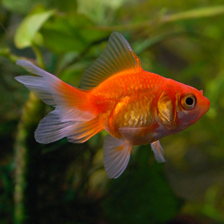

In [13]:
goldfish = Image.open("./datasets/goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [14]:
gold_fish = np.array(goldfish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [15]:
gold_fish[np.newaxis,...].shape
# we are adding one more dimension because there can be multiple images in the 
# input for prediction and not only a single image

(1, 224, 224, 3)

In [16]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [17]:
result

array([[ 0.22101453,  2.0474904 ,  9.622562  , ..., -1.462156  ,
        -0.28146732, -0.2598489 ]], dtype=float32)

In [18]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [19]:
image_labels = []
with open("./datasets/ImageNetLabels.txt","r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [20]:
image_labels[predicted_label_index]

'goldfish'

# flowers dataset

In [21]:
data_dir = r".\datasets\flower_photos"
data_dir

'.\\datasets\\flower_photos'

In [22]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [23]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [24]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [25]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

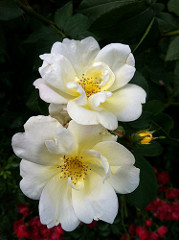

In [26]:
Image.open(roses[0])

In [27]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

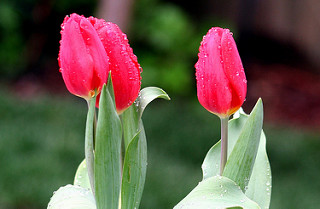

In [28]:
Image.open(tulips[0])

In [29]:
flower_images_dict = {
    "daisy": list(data_dir.glob('daisy/*.jpg')),
    "dandelion":list(data_dir.glob('dandelion/*.jpg')),
    "roses":list(data_dir.glob('roses/*.jpg')),
    "sunflowers":list(data_dir.glob('sunflowers/*.jpg')),
    "tulips":list(data_dir.glob('tulips/*.jpg'))
       }

In [30]:
flower_labels_dict = {
     "daisy": 0,
    "dandelion":1,
    "roses":2,
    "sunflowers":3,
    "tulips":4
}

In [31]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [32]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [33]:
X,y = [],[]
for name,images in flower_images_dict.items():
    for img in images:
        img = cv2.imread(str(img))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flower_labels_dict[name])

In [34]:
X[0].shape

(224, 224, 3)

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
Xtrain_scaled = Xtrain/255.0
Xtest_scaled = Xtest/255.0

In [38]:
Xtrain_scaled

array([[[[0.37647059, 0.39215686, 0.50588235],
         [0.37647059, 0.39215686, 0.50196078],
         [0.38039216, 0.39607843, 0.50196078],
         ...,
         [0.21960784, 0.23137255, 0.32941176],
         [0.22352941, 0.23137255, 0.32156863],
         [0.22745098, 0.23137255, 0.31372549]],

        [[0.38039216, 0.39607843, 0.50588235],
         [0.38431373, 0.4       , 0.50980392],
         [0.38431373, 0.40392157, 0.50588235],
         ...,
         [0.22352941, 0.23921569, 0.33333333],
         [0.22745098, 0.23529412, 0.32941176],
         [0.22745098, 0.22745098, 0.32156863]],

        [[0.38823529, 0.40392157, 0.51372549],
         [0.39215686, 0.40784314, 0.50980392],
         [0.39215686, 0.41568627, 0.50980392],
         ...,
         [0.23529412, 0.24705882, 0.34509804],
         [0.23921569, 0.24313725, 0.34509804],
         [0.24313725, 0.23921569, 0.34509804]],

        ...,

        [[0.39215686, 0.37254902, 0.48235294],
         [0.39607843, 0.38039216, 0.48627451]

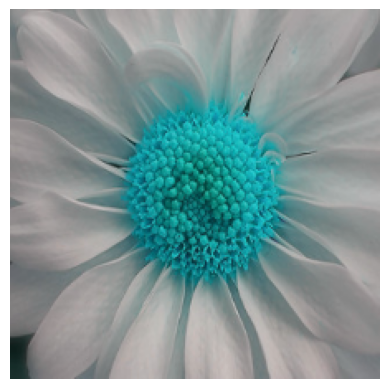

In [39]:
plt.axis('off')
plt.imshow(X[0])

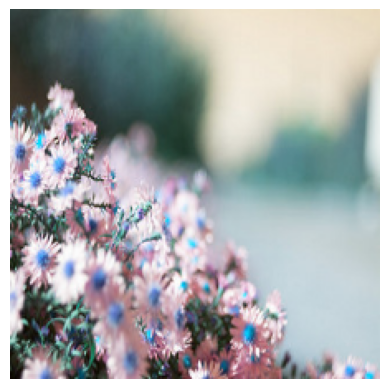

In [40]:
plt.axis('off')
plt.imshow(X[151])

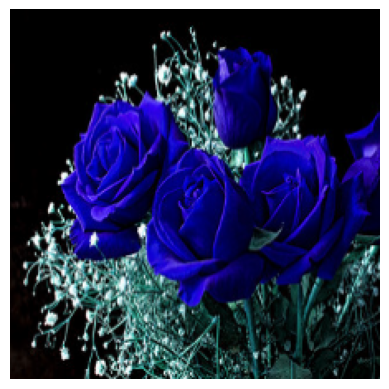

In [41]:
plt.axis('off')
plt.imshow(X[2000])

In [42]:
predicted = classifier.predict(np.array([X[0],X[151],X[2000]]))
predicted.shape

1/1 [==============================] - 2s 2s/step


(3, 1001)

In [43]:
predicted_labels = np.argmax(predicted,axis=1)
predicted_labels

array([795, 795, 550], dtype=int64)

In [44]:
# from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

# decoded_predictions = decode_predictions(predicted, top=5)  # Get top 5 predictions

# # Print the decoded classes
# for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
#     print(f"{i+1}: {label} with probability {score}")


In [45]:
image_labels[predicted_labels[2]]

'envelope'

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

<h3>Fine-Tuning</h3>

In [47]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)
# here, trainable = False as we want to freeze the weights of the pretrained model
# (not fine-tuning)

In [48]:
import tf_keras as tfk

In [49]:
num_of_flowers = 5

model = tfk.Sequential([
    feature_extractor_layer, # freezing these layers
    tfk.layers.Dense(num_of_flowers) # changing the output layer to get desired outputs
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
86/86 [==============================] - 44s 449ms/step - loss: 0.9539 - accuracy: 0.6392
Epoch 2/10
86/86 [==============================] - 38s 446ms/step - loss: 0.9154 - accuracy: 0.6573
Epoch 3/10
86/86 [==============================] - 38s 439ms/step - loss: 0.8936 - accuracy: 0.6751
Epoch 4/10
86/86 [==============================] - 38s 436ms/step - loss: 0.8606 - accuracy: 0.6828
Epoch 5/10
86/86 [==============================] - 39s 452ms/step - loss: 0.8347 - accuracy: 0.6908
Epoch 6/10
86/86 [==============================] - 38s 444ms/step - loss: 0.8112 - accuracy: 0.7108
Epoch 7/10
86/86 [==============================] - 37s 425ms/step - loss: 0.7959 - accuracy: 0.7089
Epoch 8/10
86/86 [==============================] - 37s 431ms/step - loss: 0.7815 - accuracy: 0.7238
Epoch 9/10
86/86 [==============================] - 37s 436ms/step - loss: 0.7660 - accuracy: 0.7264
Epoch 10/10
86/86 [==============================] - 37s 432ms/step - loss: 0.7590 - accura

In [55]:
model.evaluate(Xtest_scaled[:5],ytest[:5])

1/1 [==============================] - 2s 2s/step - loss: 1.2482 - accuracy: 0.6000


[1.248203992843628, 0.6000000238418579]